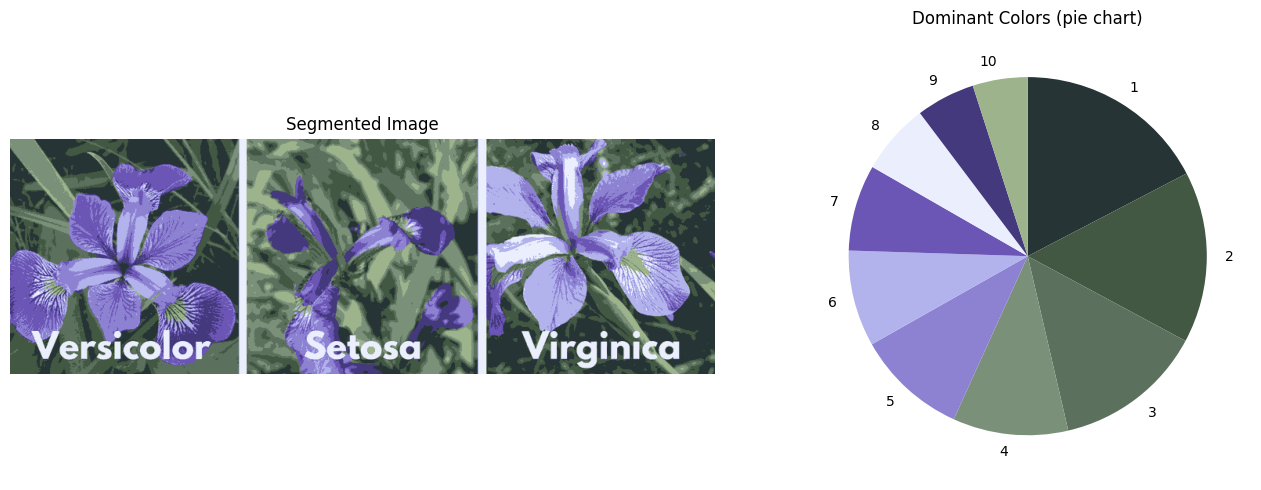

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread(r"/content/iris_types.jpg")
image_rgb = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2RGB)
pixel = image_rgb.reshape((-1,3))
pixel = np.float32(pixel)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100,0.85)
k=10
_,labels,centers = cv2.kmeans(pixel,k,None,criteria,5,cv2.KMEANS_PP_CENTERS)
centers = np.uint8(centers)
_,counts = np.unique(labels,return_counts=True)
fig, ax = plt.subplots(1, 2, figsize=(14,5))
segment_data = centers[labels.flatten()]
segment_image = segment_data.reshape((image_rgb.shape))
ax[0].imshow(segment_image)
ax[0].set_title("Segmented Image")
ax[0].axis('off')
sorted_indices = np.argsort(-counts)
sorted_colors = centers[sorted_indices]
sorted_counts = counts[sorted_indices]
fractions = sorted_counts/np.sum(sorted_counts)
ax[1].pie(fractions, colors=np.array(sorted_colors)/255,labels=[f'{i+1}'for i in range (k)],startangle=90,counterclock=False)
ax[1].set_title("Dominant Colors (pie chart)")
plt.tight_layout()
plt.show()

In [17]:
!pip install opencv-python